# Golden Cross / Death Cross SPY (GLD)

    1. sma50>sma200, buy SPY
    2. sma50<sma200, sell your long SPY position
    3. when out of your SPY position, hold GLD

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
other_symbol = 'GLD'
#other_symbol = 'TLT'
#other_symbol = 'SHY'
#other_symbol = 'SH'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [4]:
use_adj = True

Use cache?

In [5]:
use_cache = False

Fetch symbol data from internet; use cache if available.

In [6]:
ts = pf.fetch_timeseries(symbol, use_cache=use_cache)
ts.head()

,high,low,open,close,volume,adj_close
date,,,,,,
1993-01-29,43.97,43.75,43.97,43.94,1003200.00,26.45
1993-02-01,44.25,43.97,43.97,44.25,480500.00,26.64
1993-02-02,44.38,44.12,44.22,44.34,201300.00,26.70
1993-02-03,44.84,44.38,44.41,44.81,529400.00,26.98
1993-02-04,45.09,44.47,44.97,45.00,531500.00,27.09


Select timeseries between start and end. Back adjust prices relative to adj_close for dividends and splits.

In [7]:
ts = pf.select_tradeperiod(ts, start, end, use_adj)
ts.head()

,high,low,open,close,volume,adj_close
date,,,,,,
1993-01-29,26.47,26.34,26.47,26.45,1003200.00,26.45
1993-02-01,26.64,26.47,26.47,26.64,480500.00,26.64
1993-02-02,26.72,26.57,26.62,26.70,201300.00,26.70
1993-02-03,27.00,26.72,26.74,26.98,529400.00,26.98
1993-02-04,27.15,26.77,27.07,27.09,531500.00,27.09


Add technical indicator: 50 day ma and 200 day ma

In [8]:
sma50 = SMA(ts, timeperiod=50)
ts['sma50'] = sma50

sma200 = SMA(ts, timeperiod=200)
ts['sma200'] = sma200

ts.tail()

,high,low,open,close,volume,adj_close,sma50,sma200
date,,,,,,,,
2020-01-27,325.12,322.66,323.03,323.50,84062500.00,323.50,318.69,297.76
2020-01-28,327.85,323.60,325.06,326.89,63834000.00,326.89,319.08,297.97
2020-01-29,328.63,326.40,328.38,326.62,53888900.00,326.62,319.45,298.17
2020-01-30,327.91,323.54,324.36,327.68,75491800.00,327.68,319.80,298.38
2020-01-31,327.17,320.73,327.00,321.73,113688600.00,321.73,320.02,298.56


Add additional symbols and their indicators

In [9]:
def add_symbol_columns(ts, symbol, symbol_ts, columns):
    
    for column in columns:
        column_name = symbol + '_' + column
        ts[column_name] = symbol_ts[column]
    return ts

def add_symbols(ts, symbols, dir_name='data', use_cache=True, from_year=None):
    
    for symbol in symbols:
        
        # add another symbol
        _ts = pf.fetch_timeseries(symbol, use_cache=True)
        _ts = pf.select_tradeperiod(_ts, start, end, use_adj)
    
        # Add technical indicator: 200 day ma
        # we are not actually going to use this in the algorithm
        # including this for demonstration purposes
        sma200 = SMA(_ts, timeperiod=200)
        _ts['sma200'] = sma200
        
        ts = add_symbol_columns(ts, symbol, _ts, columns=['high', 'low', 'close', 'sma200'])
    return ts

ts = add_symbols(ts, symbols=[other_symbol], use_cache=use_cache)

ts.head()

,high,low,open,close,volume,adj_close,sma50,sma200,GLD_high,GLD_low,GLD_close,GLD_sma200
date,,,,,,,,,,,,
1993-01-29,26.47,26.34,26.47,26.45,1003200.00,26.45,nan,nan,nan,nan,nan,nan
1993-02-01,26.64,26.47,26.47,26.64,480500.00,26.64,nan,nan,nan,nan,nan,nan
1993-02-02,26.72,26.57,26.62,26.70,201300.00,26.70,nan,nan,nan,nan,nan,nan
1993-02-03,27.00,26.72,26.74,26.98,529400.00,26.98,nan,nan,nan,nan,nan,nan
1993-02-04,27.15,26.77,27.07,27.09,531500.00,27.09,nan,nan,nan,nan,nan,nan


Drop all rows that have nan column values

In [10]:
ts = ts.dropna()
ts.tail()

,high,low,open,close,volume,adj_close,sma50,sma200,GLD_high,GLD_low,GLD_close,GLD_sma200
date,,,,,,,,,,,,
2020-01-21,332.18,330.82,330.90,331.30,77742400.00,331.30,316.95,296.86,146.86,145.55,146.74,135.21
2020-01-22,332.95,331.17,332.24,331.34,48914900.00,331.34,317.45,297.10,146.81,146.38,146.79,135.34
2020-01-23,332.17,329.41,330.63,331.72,51963000.00,331.72,317.93,297.33,147.62,146.62,147.12,135.46
2020-01-24,332.53,327.36,332.44,328.77,87578400.00,328.77,318.37,297.56,148.38,146.89,147.98,135.58
2020-01-27,325.12,322.66,323.03,323.50,84062500.00,323.50,318.69,297.76,149.32,148.46,148.49,135.71


Create Trade Log (tlog); Create Daily Balance (dbal)

In [11]:
tlog = pf.TradeLog()
dbal = pf.DailyBal()

Algo: Buy SPY when 50 day ma crosses above 200 day ma.  Sell when 50 day ma crosses below 200 day ma. 
Hold GLD when not in SPY.

In [12]:
tlog.cash = capital
tlog.position = None
tlog.previous_position = None
start_flag = True
end_flag = False

import time
t0 = time.time()

for i, row in enumerate(ts.itertuples()):

    date = row.Index.to_pydatetime()
    high = row.high
    low = row.low
    close = row.close
    sma50 = row.sma50
    sma200 = row.sma200
    other_high = getattr(row, other_symbol + '_high')
    other_low = getattr(row, other_symbol + '_low')
    other_close = getattr(row, other_symbol + '_close')
    end_flag = True if (i == len(ts) - 1) else False
    shares = 0
        
    if date < start:
        continue
    elif start_flag:
        start_flag = False
        # set start and end
        start = date
        end = ts.index[-1]
        
    # last row
    if end_flag:
        if tlog.position == symbol:
            tlog.exit_trade(date, close, symbol=symbol)
        elif tlog.position == other_symbol:
            tlog.exit_trade(date, other_close, symbol=other_symbol)
        tlog.position = None
    # buy SPY and sell GLD
    elif (tlog.position != symbol
          and sma50 > sma200 and ts['sma50'][i-1] <= ts['sma200'][i-1]):
        if tlog.position == other_symbol:
            tlog.exit_trade(date, other_close, symbol=other_symbol)
        tlog.enter_trade(date, close, symbol=symbol)
        tlog.position = symbol
    # sell SPY and buy GLD
    elif (tlog.position == symbol
          and sma50 < sma200 and ts['sma50'][i-1] >= ts['sma200'][i-1]):
        tlog.exit_trade(date, close, symbol=symbol)
        tlog.enter_trade(date, other_close, symbol=other_symbol)
        tlog.position = other_symbol
    # No position yet, so buy GLD
    elif tlog.position is None:
        tlog.enter_trade(date, other_close, symbol=other_symbol)
        tlog.position = other_symbol

    # record daily balance
    if tlog.position == other_symbol:
        dbal.append(date, other_high, other_low, other_close, tlog.shares, tlog.cash)
    else:
        dbal.append(date, high, low, close, tlog.shares, tlog.cash)

t1 = time.time()
total = t1-t0
print(total)
        

0.0701999664307


Retrieve raw log and trade log DataFrames

In [13]:
rlog = tlog.get_log_raw()
tlog = tlog.get_log()

In [14]:
rlog.tail(20)

,date,price,shares,entry_exit,symbol
8,2010-07-07,117.73,176,entry,GLD
9,2010-10-13,134.07,176,exit,GLD
10,2010-10-13,97.93,241,entry,SPY
11,2011-08-17,100.83,241,exit,SPY
12,2011-08-17,174.42,139,entry,GLD
13,2012-01-23,163.16,139,exit,GLD
14,2012-01-23,112.18,202,entry,SPY
15,2015-09-03,178.86,202,exit,SPY
16,2015-09-03,107.84,335,entry,GLD
17,2015-12-09,102.64,335,exit,GLD


In [15]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
4,2010-07-07,117.73,2010-10-13,134.07,16.34,2875.84,176,13623.95,GLD
5,2010-10-13,97.93,2011-08-17,100.83,2.91,700.68,241,14324.63,SPY
6,2011-08-17,174.42,2012-01-23,163.16,-11.26,-1565.14,139,12759.49,GLD
7,2012-01-23,112.18,2015-09-03,178.86,66.69,13470.87,202,26230.36,SPY
8,2015-09-03,107.84,2015-12-09,102.64,-5.20,-1742.00,335,24488.36,GLD
9,2015-12-09,188.79,2016-01-15,173.70,-15.09,-2746.33,182,21742.02,SPY
10,2016-01-15,104.08,2016-04-20,118.97,14.89,4526.56,304,26268.58,GLD
11,2016-04-20,195.32,2018-12-12,259.01,63.69,11782.99,185,38051.57,SPY
12,2018-12-12,117.79,2019-03-26,124.30,6.51,2649.57,407,40701.14,GLD
13,2019-03-26,277.11,2020-01-27,323.50,46.39,8442.81,182,49143.95,SPY


In [16]:
dbal = dbal.get_log(tlog)
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-01-21,60723.71,60476.19,60563.55,182,266.95,-
2020-01-22,60863.85,60539.89,60570.83,182,266.95,-
2020-01-23,60721.89,60219.57,60639.99,182,266.95,-
2020-01-24,60787.41,59846.47,60103.09,182,266.95,-
2020-01-27,59143.95,59143.95,59143.95,0,59143.95,X


Generate strategy stats - display all available stats

In [17]:
stats = pf.stats(ts, tlog, dbal, start, end, capital)
pf.print_full(stats)

start                                                   2005-09-02
end                                                     2020-01-27
beginning_balance                                            10000
ending_balance                                            59143.95
total_net_profit                                          49143.95
gross_profit                                              55197.42
gross_loss                                                -6053.47
profit_factor                                                 9.12
return_on_initial_capital                                   491.44
annual_return_rate                                           13.14
trading_period                           14 years 4 months 25 days
pct_time_in_market                                          100.00
total_num_trades                                                14
trades_per_year                                               0.97
num_winning_trades                                            

Run Benchmark

In [18]:
benchmark = pf.Benchmark(symbol, capital, start, end, use_adj)
benchmark.run()

2005-09-02 00:00:00 BUY  109 SPY @ 91.23
2020-01-27 00:00:00 SELL 109 SPY @ 323.50


Retrieve benchmark logs

In [19]:
benchmark.tlog, benchmark.dbal = benchmark.get_logs()

Generate benchmark stats

In [20]:
benchmark.stats = benchmark.get_stats()

Plot Equity Curves: Strategy vs Benchmark

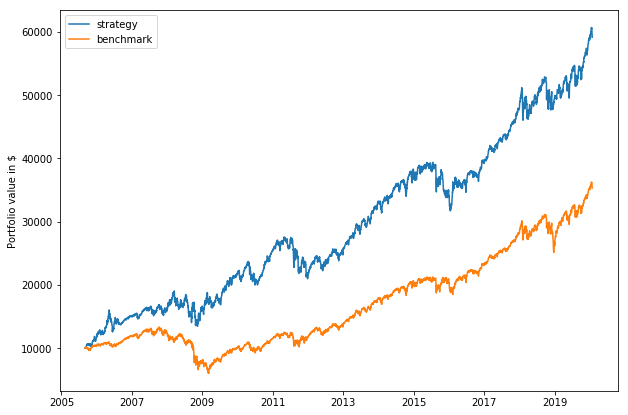

In [21]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Strategy vs Benchmark

In [22]:
df = pf.summary5(stats, benchmark.stats)
df

,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$59,143.95","$35,316.91"
total_net_profit,"$49,143.95","$25,316.91"
gross_profit,"$55,197.42","$25,316.91"
gross_loss,"-$6,053.47",$0.00


,strategy,benchmark
annual_return_rate,13.14,9.16
max_closed_out_drawdown,-29.39,-54.96
drawdown_annualized_return,-2.24,-6.00
drawdown_recovery,-0.66,-1.42
best_month,22.99,23.40
worst_month,-19.65,-29.26
sharpe_ratio,0.80,0.57
sortino_ratio,1.01,0.69
monthly_std,4.49,4.25
trades_per_year,0.97,0.07


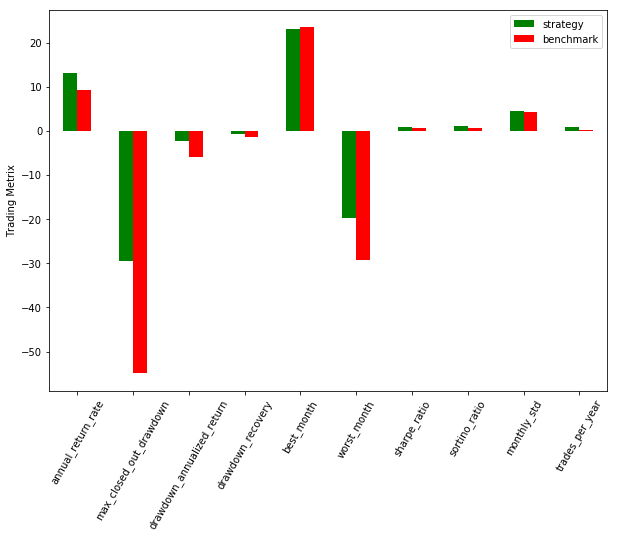

In [23]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'trades_per_year')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df